<a href="https://colab.research.google.com/github/AndrewCrossman/Graduate_Research/blob/main/BNL_2023/EXAFS_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXAFS_Analysis.ipynb

This code will help analyze EXAFS data stored on a shared google drive.

**Capabilities:**


# Imports

In [55]:
from google.colab import drive
import csv
import glob
import re
import numpy as np
import pandas as pd
import scipy as sp
from scipy import optimize
from google.colab import files
import matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Mount Google Drive Access

In [33]:
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [34]:
!ls '/content/drive/MyDrive/2023-07-30'

 athena_projects   Cu-2423M.002       experiment.log   Ni-2623C.004
'chi(k)'	   Cu-2423M.003      'mu(E)'	       Ni-2623D.001
'chi(q)'	   Cu-2423M.004       Ni-2326K.001     Ni-2623D.002
'chi(R)'	   Cu-2423N.001       Ni-2326K.002     Ni-2623D.003
 Cu-1223.001	   Cu-2423N.002       Ni-2326K.003     Ni-2623D.004
 Cu-1223.002	   Cu-2423N.003       Ni-2326K.004     Ni-2623E.001
 Cu-1223.003	   Cu-2423N.004       Ni-2423.001      Ni-2623E.002
 Cu-1223.004	   Cu-2423O.001       Ni-2423.002      Ni-2623E.003
 Cu-1223A.001	   Cu-2423O.002       Ni-2423.003      Ni-2623E.004
 Cu-1223A.002	   Cu-2423O.003       Ni-2423.004      Ni-2623F.001
 Cu-1223A.003	   Cu-2423O.004       Ni-2423A.001     Ni-2623F.002
 Cu-1223A.004	   Cu-2623.001	      Ni-2423A.002     Ni-2623F.003
 Cu-1223B.001	   Cu-2623.002	      Ni-2423A.003     Ni-2623F.004
 Cu-1223B.002	   Cu-2623.003	      Ni-2423A.004     Ni-2623G.001
 Cu-1223B.003	   Cu-2623.004	      Ni-2423B.001     Ni-2623G.002
 Cu-1223B.004	   Cu-2623A.001     

# xmu Analysis

In [86]:
directory_path = '/content/drive/MyDrive/2023-07-30/mu(E)'
xmu_files = glob.glob(directory_path + '/*')
sort(xmu_files)
for xmu_file in sort(xmu_files):
  print(xmu_file)
  xmu_data = pd.read_csv(xmu_file, on_bad_lines='skip', skiprows=40, names= ['energy', 'xmu', 'bkg', 'pre-edge', 'post-edge', 'der', 'sec', 'i0', 'chi'], sep="\t")
  xmu_data = xmu_data.dropna(axis=1,how='all')
xmu_data

/content/drive/MyDrive/2023-07-30/mu(E)/Cu-1223.001.xmu
/content/drive/MyDrive/2023-07-30/mu(E)/Cu-1223.002.xmu
/content/drive/MyDrive/2023-07-30/mu(E)/Cu-1223.003.xmu
/content/drive/MyDrive/2023-07-30/mu(E)/Cu-1223.004.xmu
/content/drive/MyDrive/2023-07-30/mu(E)/Cu-1223A.001.xmu
/content/drive/MyDrive/2023-07-30/mu(E)/Cu-1223A.002.xmu
/content/drive/MyDrive/2023-07-30/mu(E)/Cu-1223A.003.xmu
/content/drive/MyDrive/2023-07-30/mu(E)/Cu-1223A.004.xmu
/content/drive/MyDrive/2023-07-30/mu(E)/Cu-1223B.001.xmu
/content/drive/MyDrive/2023-07-30/mu(E)/Cu-1223B.002.xmu
/content/drive/MyDrive/2023-07-30/mu(E)/Cu-1223B.003.xmu
/content/drive/MyDrive/2023-07-30/mu(E)/Cu-1223B.004.xmu
/content/drive/MyDrive/2023-07-30/mu(E)/Cu-1223C.001.xmu
/content/drive/MyDrive/2023-07-30/mu(E)/Cu-1223C.002.xmu
/content/drive/MyDrive/2023-07-30/mu(E)/Cu-1223C.003.xmu
/content/drive/MyDrive/2023-07-30/mu(E)/Cu-1223C.004.xmu
/content/drive/MyDrive/2023-07-30/mu(E)/Cu-1223D.001.xmu
/content/drive/MyDrive/2023-07-30/m

,energy
0,8132.8340 0.59114625 0.59114625 ...
1,8142.8170 0.58701767 0.58701767 ...
2,8152.8290 0.58310136 0.58310136 ...
3,8162.9260 0.57918511 0.57918511 ...
4,8173.0060 0.57529325 0.57529325 ...
...,...
348,8953.2720 0.60864136 0.61151827 ...
349,8958.1340 0.60716608 0.61021539 ...
350,8963.0280 0.60552139 0.60892196 ...
351,8967.9350 0.60386429 0.60764368 ...


In [87]:
xmu_data[['energy', 'xmu', 'bkg', 'pre-edge', 'post-edge', 'der', 'sec', 'i0', 'chi']] = xmu_data[xmu_data.columns[0]].str.split(expand=True).astype(float)

xmu_data

,energy,xmu,bkg,pre-edge,post-edge,der,sec,i0,chi
0,8132.834,0.591146,0.591146,0.591146,0.558320,-0.000414,1.123540e-06,133.02877,0.000000
1,8142.817,0.587018,0.587018,0.587018,0.569749,-0.000402,1.203099e-06,132.96151,0.000000
2,8152.829,0.583101,0.583101,0.582877,0.580904,-0.000390,7.640411e-07,132.86776,0.000000
3,8162.926,0.579185,0.579185,0.578701,0.591842,-0.000387,-3.743072e-07,132.77718,0.000000
4,8173.006,0.575293,0.575293,0.574533,0.602448,-0.000397,-8.546466e-07,132.68694,0.000000
...,...,...,...,...,...,...,...,...,...
348,8953.272,0.608641,0.611518,0.251845,0.475156,-0.000320,2.272774e-06,117.53356,-0.089225
349,8958.134,0.607166,0.610215,0.249834,0.468493,-0.000320,-1.746238e-06,117.66584,-0.094572
350,8963.028,0.605521,0.608922,0.247810,0.461712,-0.000337,-1.282272e-06,117.52609,-0.105466
351,8967.935,0.603864,0.607644,0.245781,0.454840,-0.000332,9.977408e-07,117.40933,-0.117215


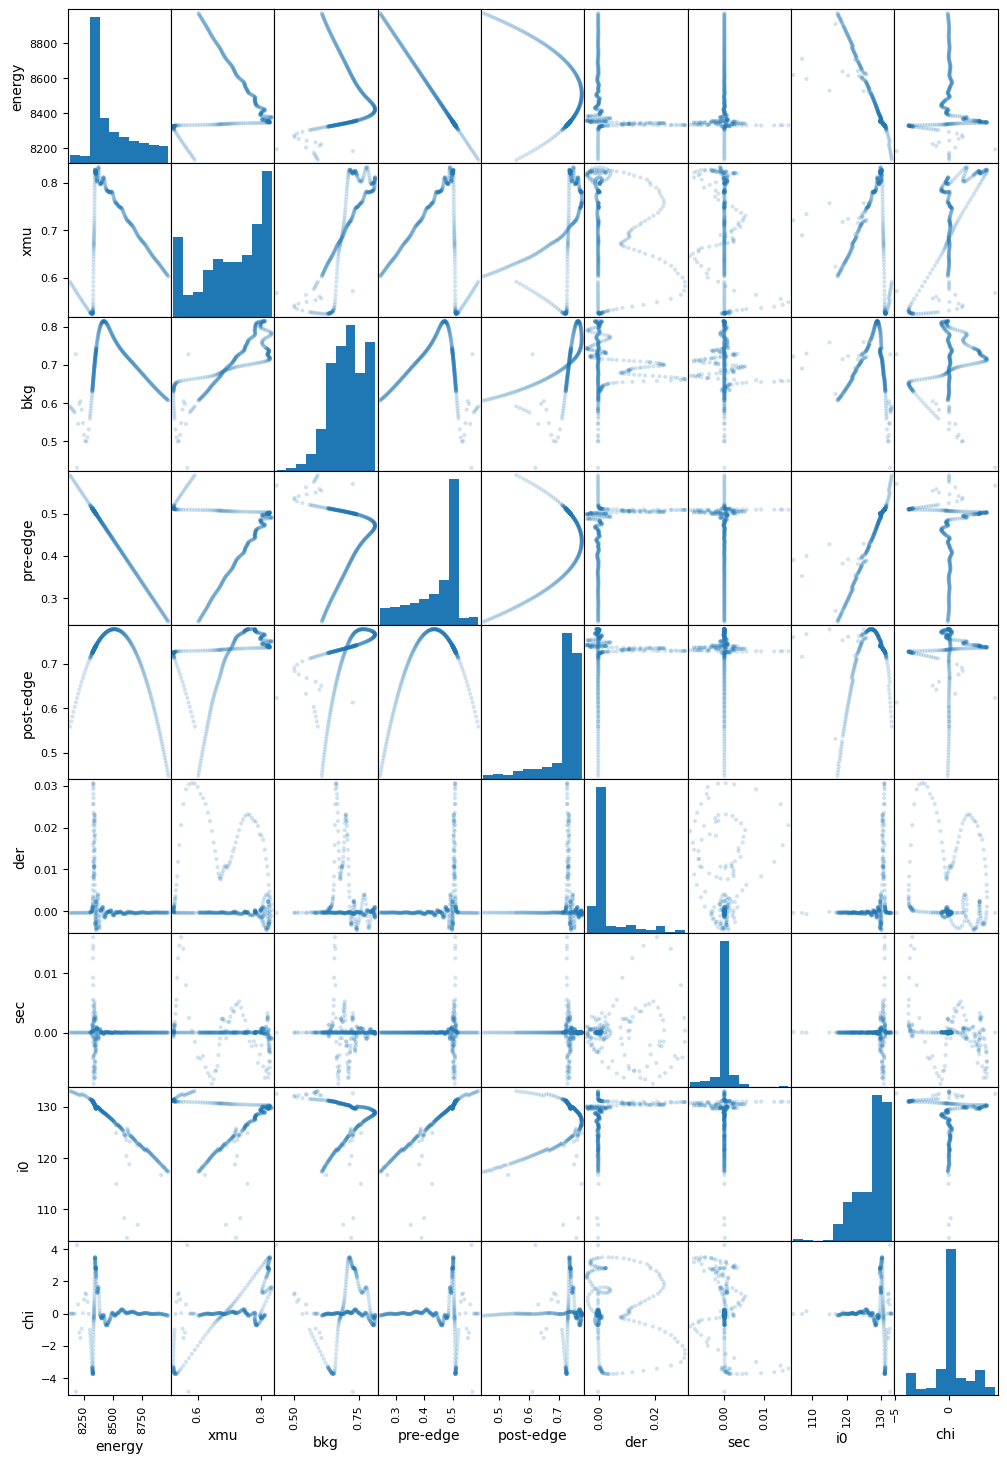

In [88]:
pd.plotting.scatter_matrix(xmu_data, alpha=.2, figsize=(12,18));

(8300.0, 8500.0)

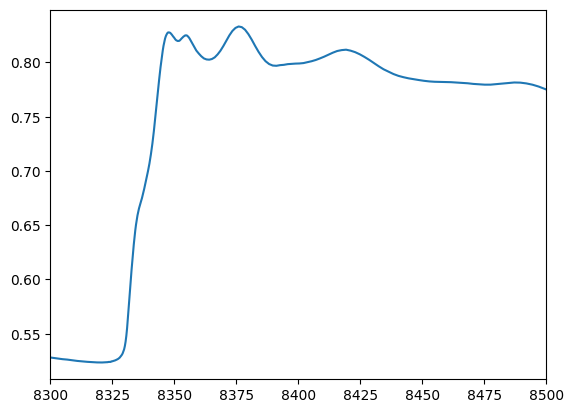

In [99]:
plt.plot(xmu_data['energy'],xmu_data['xmu'])
plt.xlim(8300,8500)